<a href="https://colab.research.google.com/github/hikyle02/PolytechTest/blob/master/yolo_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import HTML
from subprocess import getoutput
s = getoutput('nvidia-smi')
if 'K80' in s:
  gpu = 'K80'
elif 'T4' in s:
  gpu = 'T4'
elif 'P100' in s:
  gpu = 'P100'
display(HTML(f"<h2>{gpu}</h2>"))
print(s)
# or simply
!nvidia-smi -L

Sun Mar 27 08:45:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
cd drive/'My Drive'/Yolo

/content/drive/My Drive/Yolo


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.04 MiB | 5.44 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.
Checking out files: 100% (2050/2050), done.


In [ ]:
cd darknet

/content/drive/MyDrive/Yolo/darknet


## classes
'person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'

In [ ]:
#change makefile to have GPU and opencv enabled

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
#verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
#make darknet (build)
!make
#building darknet with the makefile that we made so that we can config the darknet for GPU and opencv

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
def imshow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image, (3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

def upload():
  from google.colab import files
  uploaded =files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('saved file', name)

def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
! wget https://pjreddie.com/media/files/yolov3.weights

--2022-03-27 09:03:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  33.4MB/s    in 7.3s    

2022-03-27 09:03:46 (32.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
#Run darknet detection on image

!./darknet detect cfg/yolov3.cfg yolov3.weights data/football.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

In [ ]:
#Run darknet detection on video
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show data/Mumbai.mp4 -i 0 -out_filename data/out.avi

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Vid

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Vid

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Vid

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Vid

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Vid

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Vid

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Vid

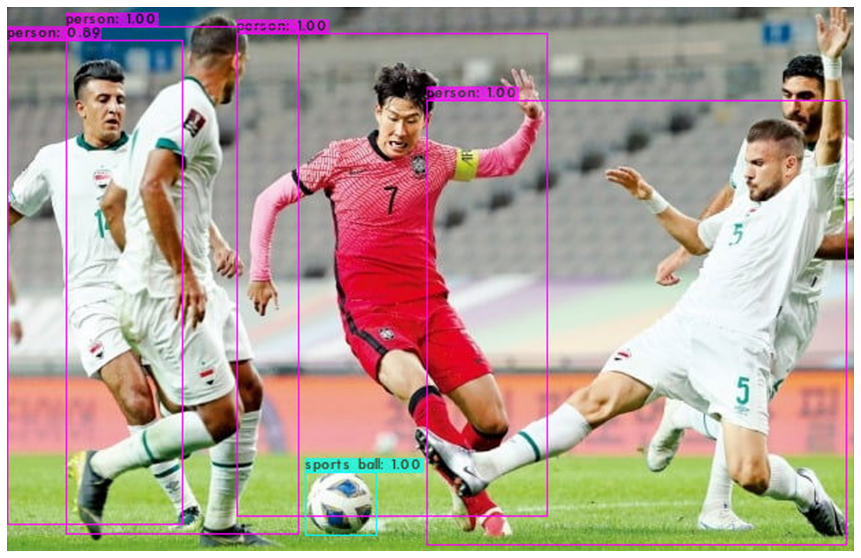

In [ ]:
imshow('predictions.jpg')